In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np



# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G


In [2]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))




In [3]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

In [4]:

le = LabelEncoder()
def transform_now(data):
    data[:,0]=le.fit_transform(data[:,0])

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     # print(xx)
     data[:,0]=le.inverse_transform(xx)

In [5]:
def process_fill(index_start,index_stop,info):
    count_sub = 1 # count index[i] each value is 0 and bring it plot index or divide
    dis_sub = 0  # find distance of value for example 10 _ _ _ 40 --> 40 - 10 = 30 = dis_sub
    dist = 0  # dist = dis_sub/count_sub
    size_info = index_stop-index_start
    for i in range(index_start,index_stop):
        if info[i] == 0:
            count_sub += 1
            # if it have a value in start day [10 0 0 0 0 0 0 0 0 0]
            if info[index_start] != 0 and count_sub == size_info:
                dist = info[index_start]
                for j in range(count_sub-1):
                    if info[j+1]==0:
                       info[j+1] = float(info[j]+dist)
                count_sub = 1
            elif i+1 ==  index_stop: #  [0  0  0  0  50  0  0  0  0], [ 0  0  0  0 50  0  0  0  0  0] 
                if count_sub %2 !=0:
                    dist = int(info[i-count_sub+1]/count_sub) 
                else:
                    dist = int(info[i-count_sub+1]/(count_sub-1))
                    if info[i-1] !=0:
                        info[i] = float(int(info[i-1])+(int((info[i-1]*6)/100))) ;"""decrease when value in last day over """
                        break
                for j in reversed(range(count_sub)):
                    # pass
                    if info[i-j] ==0:
                        info[i-j] = float(info[i-j-1]+dist)
                count_sub = 1
        elif info[i] != 0 :
            # if it have a value in final day [0 0 0 0 0 0 0 0 0 100]
            if count_sub == size_info:
                dist = int(info[i]/(count_sub))
                for j in reversed(range(count_sub)):
                    if info[j-1] ==0:
                        info[j-1] = float(info[j]-dist)
                count_sub = 1
            # if it have a value in start and final day [10 0 0 0 0 0 0 0 0 100] OR [7,0,0,10,0,15,0,0,30] OR [0 20 0 40 0 60 0 80 0 100]
            elif count_sub != 1:
                dis_sub = info[i] if count_sub>i else info[i]-info[i-count_sub]
                dist = int(dis_sub/count_sub)
                for j in range(count_sub):
                    if info[i-j-1] ==0 and i-j-1 >=0:
                        info[i-j-1] = float(info[i-j]-dist)
                count_sub = 1
    return info
    

In [6]:
"""for fill value miss by distance"""
def FILL_CUMSALES(get_group_by,info):
    print(info.shape[0])
    index_start =0
    index_stop =0
    for i in range(len(get_group_by)):
        if i ==0:
            sub_arr = info[0:get_group_by['Counts'][i],1]
            sub_arr=process_fill(0,get_group_by['Counts'][i],sub_arr)
            info[0:get_group_by['Counts'][i],1] =sub_arr
            index_stop += get_group_by['Counts'][i]
        else:
            index_start +=get_group_by['Counts'][i-1]
            index_stop +=get_group_by['Counts'][i]
            sub_arr = info[index_start:index_stop,1]
            sub_arr = process_fill(0,get_group_by['Counts'][i],sub_arr)
            info[index_start:index_stop,1] = sub_arr


In [7]:
def fill_value_miss(miss_data):
    cols =['Day','Cumsales']
    df = pd.DataFrame(miss_data,columns=cols)
    sub_day = []
    full_day = df.copy()
    for i in range(len(df)):
        sub_day.append(df['Day'][i][0:7]) 
    for i in range(len(df)):
        df['Day'][i] = sub_day[i]
    get_group_by = df.groupby('Day').size().reset_index(name='Counts')
    full_day = full_day.to_numpy() 
    FILL_CUMSALES(get_group_by,full_day)
    # for i in range(full_day.shape[0]):    
    #     print(full_day[i,0]," ",full_day[i,1])
    transform_now(full_day)
    return full_day

def find_value_miss(G):
    print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0, 1], G[0, 2], G[0, 3]))
    print("start : {}, end : {} ".format(G[0, 0], G[-1, 0]))
    date_full = gendate(G[-1, 0], G[0, 0])
    miss_data = [[0]*2 for i in range(date_full.shape[0])]
    miss_data = np.array(miss_data, dtype=object)
    count_miss_day = 0
    origin_index = 0
    for i in range(date_full.shape[0]):
        if G[origin_index, 0] == date_full[i]:  # G[G == date_full[i]]:
            miss_data[i][0] = G[origin_index, 0]
            miss_data[i][1] = G[origin_index, 5]
            origin_index += 1
        else:
            miss_data[i][0] = date_full[i]
            miss_data[i][1] = 0.0 #np.nan #float('NaN') #None
            count_miss_day += 1
    miss_data_no_fill = miss_data.copy()
    cleaned_data = fill_value_miss(miss_data)
    print('missing CumSales of invidual day =', count_miss_day)
    return cleaned_data,miss_data_no_fill


In [8]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 



In [9]:

def find_day(*Date):
    DATE = []
    month = [0,31,59,90,120,151,181,212,243,273,304,334,365]
    month_1 = [0,31,60,91,121,152,183,213,244,274,305,335,366]
    Year = [0,365,730,1096,1461,1826,2191,2557,2922,3287,3652,4018,4383]
    for i in range(len(Date)):
        match = 0
        if Date[i][:4] == "2012" or Date[i][:4] == "2016" or Date[i][:4] == "2020":
            match += Year[int(Date[i][2:4])-10]+month_1[int(Date[i][5:7])-1]+int(Date[i][-2:])-1
        else:
            match += Year[int(Date[i][2:4])-10]+month[int(Date[i][5:7])-1]+int(Date[i][-2:])-1
        DATE.append(match)
    return DATE

In [10]:
A=find_group(5,1,1)
info,before = find_value_miss(All_Group[A])



ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
4534
missing CumSales of invidual day = 269


In [29]:

kk = find_day("2019-01-01","2019-01-03","2019-01-31")
X_train = info[kk[0]:kk[1]+1,0].astype(np.int64)
y_train = info[kk[0]:kk[1]+1,1].astype(np.int64)
X_test = info[kk[1]+1:kk[2]+1,0].astype(np.int64)
y_test = info[kk[1]+1:kk[2]+1,1].astype(np.int64)



In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2
import tensorflow as tf
model = None
model = Sequential(name='godzilla')
model.add(Dense(1024,activation='linear',input_shape=(1,),name='Layer1',kernel_regularizer=L2(0.01)))
model.add(Dense(512,activation='linear',name='Layer2',kernel_regularizer=L2(0.01)))
model.add(Dense(1024,activation='linear',name='Layer3',kernel_regularizer=L2(0.01)))
model.add(Dense(1,activation='linear',name='Output'))

In [38]:
model.summary()

Model: "godzilla"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 1024)              2048      
                                                                 
 Layer2 (Dense)              (None, 512)               524800    
                                                                 
 Layer3 (Dense)              (None, 1024)              525312    
                                                                 
 Output (Dense)              (None, 1)                 1025      
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.output_shape

(None, 1)

In [40]:
adam_smash = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_smash  ,loss='MeanSquaredError',metrics=['MeanSquaredError'])

In [41]:

history = model.fit(X_train,y_train,epochs=100,verbose=1,batch_size=32,validation_data=(X_train,y_train))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 409777995776.0000 - mean_squared_error: 409777995776.0000 - val_loss: 403590447104.0000 - val_mean_squared_error: 403590447104.0000
Epoch 2/100
1/1 [==============================] - 0s 196ms/step - loss: 403590447104.0000 - mean_squared_error: 403590447104.0000 - val_loss: 395310891008.0000 - val_mean_squared_error: 395310891008.0000
Epoch 3/100
1/1 [==============================] - 0s 84ms/step - loss: 395310891008.0000 - mean_squared_error: 395310891008.0000 - val_loss: 383065784320.0000 - val_mean_squared_error: 383065784320.0000
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 383065784320.0000 - mean_squared_error: 383065784320.0000 - val_loss: 365929660416.0000 - val_mean_squared_error: 365929660416.0000
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 365929660416.0000 - mean_squared_error: 365929660416.0000 - val_loss: 343388291072.0000 - val_mean_squared_error:

In [42]:
df_hist = pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

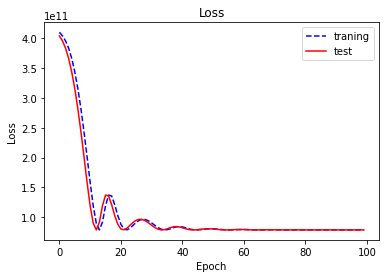

In [43]:
df_hist['loss'].plot(style='b--',label='traning')
df_hist['val_loss'].plot(style='r-',label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

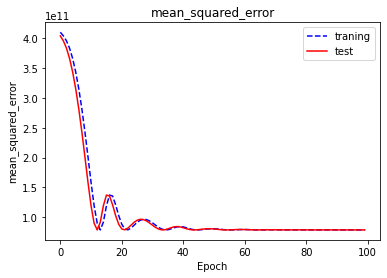

In [44]:
df_hist['mean_squared_error'].plot(style='b--',label='traning')
df_hist['val_mean_squared_error'].plot(style='r-',label='test')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.title('mean_squared_error')
plt.show()

In [45]:
score = model.evaluate(X_train,y_train,verbose=0)
print(score)
print("test loss",score[0])
print("test MAE",score[1])

[78889844736.0, 78889844736.0]
test loss 78889844736.0
test MAE 78889844736.0


1/1 [==============================] - 0s 121ms/step
[[577703.25]
 [577878.8 ]
 [578054.3 ]
 [578229.9 ]
 [578405.5 ]
 [578581.1 ]
 [578756.6 ]
 [578932.4 ]
 [579107.9 ]
 [579283.5 ]
 [579458.94]
 [579634.6 ]
 [579810.1 ]
 [579985.8 ]
 [580161.4 ]
 [580336.94]
 [580512.5 ]
 [580688.1 ]
 [580863.56]
 [581039.4 ]
 [581214.75]
 [581390.5 ]
 [581566.06]
 [581741.7 ]
 [581917.1 ]
 [582092.8 ]
 [582268.2 ]
 [582443.94]]
[ 1401464  1772848  2016512  2517721  2914422  3299610  3742545  4114325
  4621471  4653954  5048515  5434675  5949424  6326961  6830761  7123458
  7312964  7502470  7945519  8353896  8697120  9109388  9498096  9725018
  9951939 10328870 10803353 11090624]


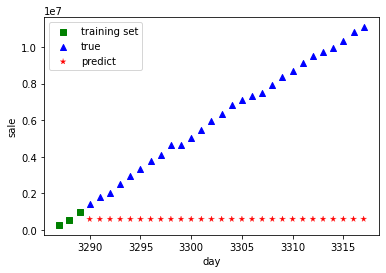

In [46]:


y_hat=model.predict([X_test])
print(y_hat)
print(y_test)
plt.scatter(X_train,y_train,marker='s',c='g',label='training set',linestyle='-')
plt.scatter(X_test,y_test,marker='^',c='b',label='true',linestyle='-')
plt.scatter(X_test,y_hat,marker='*',c='r',label='predict',linestyle=':',lw=0.5)
plt.legend()
plt.xlabel('day')
plt.ylabel('sale')
plt.show()

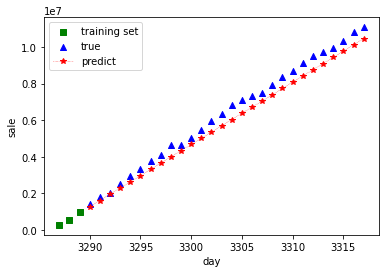

In [47]:
kk = find_day("2019-01-01","2019-01-03","2019-01-31")
X_train = info[kk[0]:kk[1]+1,0].reshape(-1,1)
y_train = info[kk[0]:kk[1]+1,1]
X_test = info[kk[1]+1:kk[2]+1,0].reshape(-1,1)
y_test = info[kk[1]+1:kk[2]+1,1]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
plt.scatter(X_train,y_train,marker='s',c='g',label='training set',linestyle='-')
plt.scatter(X_test,y_test,marker='^',c='b',label='true',linestyle='-')
plt.plot(X_test,y_hat,marker='*',c='r',label='predict',linestyle=':',lw=0.5)
plt.legend()
plt.xlabel('day')
plt.ylabel('sale')
plt.show()
